# Install the scikit-learn library.

## Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [5]:
# Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.
# Already installed the scikit-learn library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Define Path
path = r"C:\Users\toloz\Achivement 6 data immersion\02 data\air bnb" 

In [7]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
# Import data 
df_listings = pd.read_csv(os.path.join(path, 'Listings_Cleaned.csv'))
df_neighbourhoods = pd.read_csv(os.path.join(path, 'Neighbourhoods_Cleaned.csv'))
df_calendar = pd.read_csv(os.path.join(path, 'Calendar_Cleaned.csv'))
df_listings_details = pd.read_csv(os.path.join(path, 'Listings_Details_Cleaned.csv'))

#df_listings.head()
#df_calendar.head()
#df_listings_details.head()
#df_neighbourhoods.head()

#Neighbourhoods_Cleaned
#Listings_Details_Cleaned
#Listings_Cleaned
#Calendar_Cleaned

In [9]:
# List of DataFrames
dfs = [df_listings, df_calendar, df_listings_details, df_neighbourhoods]

# Drop the 'Unnamed: 0' column from each DataFrame
for df in dfs:
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)

# Clean your data so that it’s ready for analysis. 
## Data already cleaned from previous steps!

# Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

In [12]:
df_listings_details.columns

Index(['id', 'name', 'space', 'experiences_offered', 'neighborhood_overview',
       'access', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'license',
       'cancellation_policy'

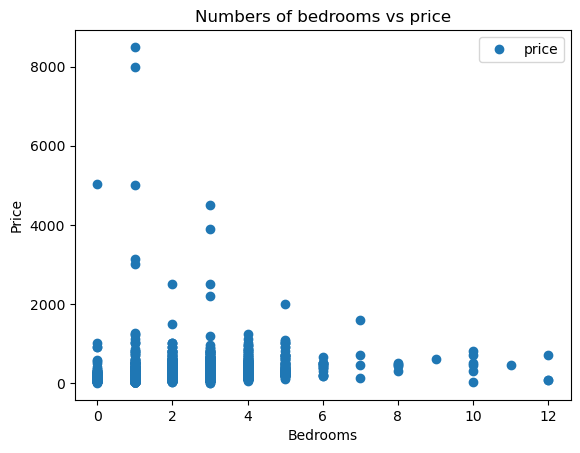

In [13]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_listings_details.plot(x = 'bedrooms', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Numbers of bedrooms vs price')  
plt.xlabel('Bedrooms')  
plt.ylabel('Price')  
plt.show()

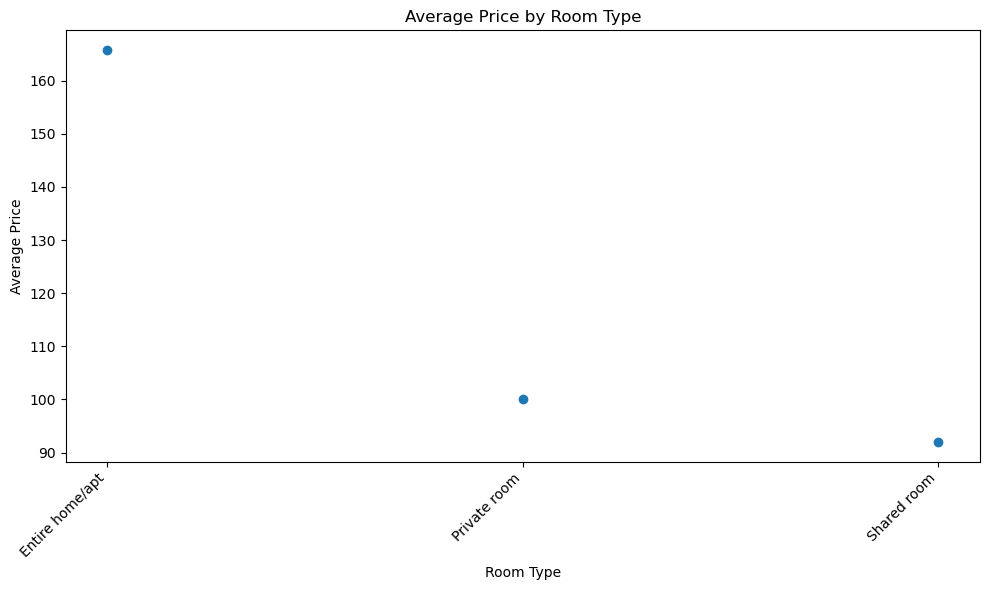

In [14]:
# Group by room type and calculate the average price
grouped_data = df_listings_details.groupby('room_type')['price'].mean()

# Create a scatter plot using plt.scatter
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data.index, grouped_data.values)

# Improve plot readability
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Optional: Adjust layout to avoid label cutoff
plt.tight_layout()

# Show the plot
plt.show()



# State your hypothesis in a markdown cell within your Jupyter notebook.

## Larger properties (e.g., more bedrooms) will have higher prices.

# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_listings_details['bedrooms'].values.reshape(-1,1)
y = df_listings_details['price'].values.reshape(-1,1)

In [19]:
X

array([[1.],
       [2.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

In [20]:
y

array([[ 59.],
       [160.],
       [ 80.],
       ...,
       [ 80.],
       [ 55.],
       [220.]])

# Split the data into two sets: a training set and a test set. 

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Run a linear regression on the data.
## First, fit the model you created to the training set.
## Then, create a prediction for y on the test set.

In [24]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set. 

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [27]:
#  Create a plot that shows the regression line on the test set.

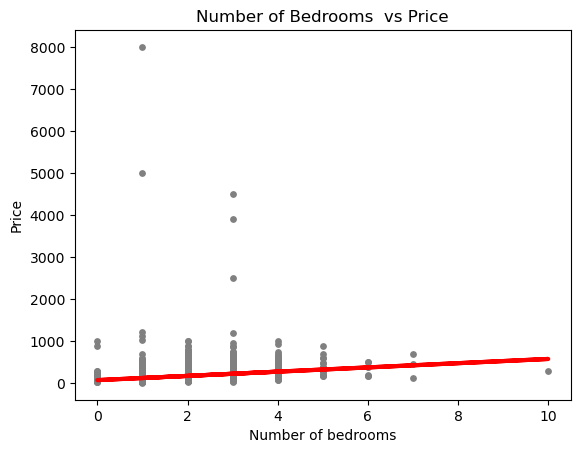

In [73]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Bedrooms  vs Price')
plot_test.xlabel('Number of bedrooms')
plot_test.ylabel('Price')
plot_test.savefig("Number of Bedrooms vs Price")
plot_test.show()

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

## The scatterplot shows a weak positive relationship between the number of bedrooms and price, as indicated by the regression line. While properties with more bedrooms tend to have slightly higher prices, the wide scatter of data points, especially for 1 to 3 bedrooms, suggests that other factors like location or amenities may play a more significant role in determining price.

# Check the model performance statistics—MSE and R2 score.

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [75]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

r2_percentage = r2 * 100
print(f"R² Score as Percentage: {r2_percentage:.2f}%")

Slope: [[50.330751]]
Mean squared error:  27742.240786642884
R2 score:  0.06889607732857284
R² Score as Percentage: 6.89%


# Compare the predicted y values with the actual y values in a dataframe.

In [35]:
y_predicted

array([[279.84517904],
       [179.18367704],
       [128.85292604],
       ...,
       [128.85292604],
       [128.85292604],
       [128.85292604]])

In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,150.0,279.845179
1,140.0,179.183677
2,150.0,128.852926
3,80.0,128.852926
4,130.0,128.852926
5,105.0,179.183677
6,50.0,128.852926
7,100.0,128.852926
8,115.0,128.852926
9,89.0,78.522175


# Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

Model Performance on the Test Set
The model's performance on the test set is weak, as indicated by the low R² score of 0.0689, which suggests that only ~6.9% of the variance in price is explained by the number of bedrooms. Additionally, the mean squared error (MSE) of 27,742 indicates significant prediction errors. The slope of 50.33 implies a modest increase in price with each additional bedroom, but the variability in actual prices suggests that this relationship is not strong.

Reflections on Data Bias
The weak model performance may result from data bias or unaccounted factors. For instance, other attributes such as location, property condition, or amenities might strongly influence price but were not included in the analysis. Additionally, potential over-representation of properties with certain characteristics (e.g., smaller apartments) could distort the model's ability to generalize. Addressing these biases and including additional predictors could improve model accuracy.